In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [33]:
from local.test import *
from local.torch_core import *

# Torch Core 

## Basics 

In [3]:
test_eq(tensor(np.array([1,2,3])), torch.tensor([1,2,3]))
test_eq(tensor(1,2,3), torch.tensor([1,2,3]))
test_eq_type(tensor(1.0), torch.tensor(1.0))

In [4]:
set_seed(2*33)
a1 = np.random.random()
a2 = torch.rand(())
a3 = random.random()
set_seed(2*33)
b1 = np.random.random()
b2 = torch.rand(())
b3 = random.random()
test_eq(a1, b1)
test_eq(a2, b2)
test_eq(a3, b3)

In [5]:
class _T(TensorBase): pass

t = _T(range(5))
test_eq_type(t[0], _T(0))
test_eq_type(t[:2], _T([0,1]))
test_eq_type(t+1, _T(range(1,6)))
test_eq(type(pickle.loads(pickle.dumps(t))), _T)

## L 

In [6]:
t = L(([1,2], [3,4]))
test_eq(t.tensored(), [tensor(1,2), tensor(3,4)])

In [7]:
test_eq(t.stack(), tensor([[1,2], [3,4]]))

In [8]:
test_eq(t.cat(), tensor(1,2,3,4))

## Chunks 

In [9]:
a, b, c = [1], [1, 2], [1, 1, 2]
test_eq(concat(a, b), c)
test_eq_type(concat(tuple(a), tuple(b)), tuple(c))
test_eq_type(concat(tensor(a), tensor(b)), tensor(c))
test_eq_type(concat(TensorBase(a),TensorBase(b)), TensorBase(c))
test_eq_type(concat([1,1],1), [1,1,1])
test_eq_type(concat(1,1,1), L(1,1,1))
test_eq_type(concat(L(1,2),1), L(1,2,1))

In [10]:
docs = L(list(string.ascii_lowercase[a:b]) for a,b in ((0,3),(3,7),(7,8),(8,16),(16,24),(24,26)))

b = Chunks(docs)
test_eq([b[ o] for o in range(0,5)], ['a','b','c','d','e'])
test_eq([b[-o] for o in range(1,6)], ['z', 'y', 'x','w','v'])
test_eq(b[6:13], "g,h,i,j,k,l,m".split(","))
test_eq(b[20:77], "u,v,w,x,y,z".split(","))
test_eq(b[:5], "a,b,c,d,e".split(","))
test_eq(b[:2], "a,b".split(","))

In [11]:
t = torch.arange(26)
docs = L(t[a:b] for a,b in ((0,3),(3,7),(7,8),(8,16),(16,24),(24,26)))
b = Chunks(docs)
test_eq([b[ o] for o in range(0,5)], range(0,5))
test_eq([b[-o] for o in range(1,6)], [25,24,23,22,21])
test_eq(b[6:13], torch.arange(6,13))
test_eq(b[20:77], torch.arange(20,26))
test_eq(b[:5], torch.arange(5))
test_eq(b[:2], torch.arange(2))

In [12]:
docs = L(TensorBase(t[a:b]) for a,b in ((0,3),(3,7),(7,8),(8,16),(16,24),(24,26)))
b = Chunks(docs)
test_eq_type(b[:2], TensorBase(range(2)))
test_eq_type(b[:5], TensorBase(range(5)))
test_eq_type(b[9:13], TensorBase(range(9,13)))

## Other functions 

In [ ]:
#cuda
_td = torch.device(torch.cuda.current_device())
test_eq(default_device(None), _td)
test_eq(default_device(True), _td)
test_eq(default_device(False), torch.device('cpu'))
default_device(None);

In [ ]:
# cuda
t = to_device((3,(tensor(3),tensor(2))))
t1,(t2,t3) = t
test_eq_type(t,(3,(tensor(3).cuda(),tensor(2).cuda())))
test_eq(t2.type(), "torch.cuda.LongTensor")
test_eq(t3.type(), "torch.cuda.LongTensor")

In [13]:
t = to_device((3,(tensor(3),tensor(2))))
t1,(t2,t3) = t

t3 = to_cpu(t3)
test_eq(t3.type(), "torch.LongTensor")
test_eq(t3, 2)

In [14]:
t3 = to_np(t3)
test_eq(type(t3), np.ndarray)
test_eq(t3, 2)

In [15]:
dev = default_device()
test_eq(find_device(t2), dev)
test_eq(find_device([t2, t2]), dev)
test_eq(find_device({"a":t2, "b":t2}), dev)
test_eq(find_device({"a":[[t2], [t2]], "b": t2}), dev)

In [16]:
x = torch.randn(4,5)
test_eq(find_bs(x), 4)
test_eq(find_bs([x, x]), 4)
test_eq(find_bs({"a": x, "b": x}), 4)
test_eq(find_bs({"a": [[x], [x]], "b":x}), 4)

In [17]:
from sklearn.metrics import f1_score

@np_func
def f1(inp, targ): return f1_score(targ, inp)

a1, a2 = np.array([0, 1, 1]), np.array([1, 0, 1])
t = f1(tensor(a1), tensor(a2))
test_eq(f1_score(a1, a2), t)
assert isinstance(t, Tensor)

In [18]:
class _T(Module):
    def __init__(self): self.f = nn.Linear(1,1)
    def forward(self, x): return self.f(x)
    
t = _T()
t(tensor([1.]))

tensor([-1.0893], grad_fn=<AddBackward0>)

In [19]:
test_eq(one_hot([1,4], 5), tensor(0,1,0,0,1).byte())
test_eq(one_hot([], 5), tensor(0,0,0,0,0).byte())
test_eq(one_hot(2, 5), tensor(0,0,1,0,0).byte())

In [20]:
test_eq(one_hot_decode(tensor(0,1,0,0,1)), [1,4])
test_eq(one_hot_decode(tensor(0,0,0,0,0)), [   ])
test_eq(one_hot_decode(tensor(0,0,1,0,0)), [2  ])

In [21]:
m = nn.Linear(4, 5)
test_eq(trainable_params(m), [m.weight, m.bias])
m.weight.requires_grad_(False)
test_eq(trainable_params(m), [m.bias])

In [22]:
model = nn.Sequential(nn.Linear(10,20), nn.BatchNorm1d(20), nn.Conv1d(3,4,3))
test_eq(bn_bias_params(model), [model[0].bias, model[1].weight, model[1].bias, model[2].bias])
model = nn.ModuleList([nn.Linear(10,20), nn.Sequential(nn.BatchNorm1d(20), nn.Conv1d(3,4, 3))])
test_eq(bn_bias_params(model), [model[0].bias, model[1][0].weight, model[1][0].bias, model[1][1].bias])
model = nn.ModuleList([nn.Linear(10,20), nn.Sequential(nn.BatchNorm1d(20), nn.Conv1d(3,4, 3))])
test_eq(bn_bias_params(model, with_bias=False), [model[1][0].weight, model[1][0].bias])

In [23]:
t = tensor([1,2,3])
test_eq(batch_to_samples([t,t+1], max_n=2), ([1,2],[2,3]))
test_eq(batch_to_samples(tensor([1,2,3]), 10), [1, 2, 3])
test_eq(batch_to_samples([tensor([1,2,3]), tensor([4,5,6])], 10), [(1, 4), (2, 5), (3, 6)])
test_eq(batch_to_samples([tensor([1,2,3]), tensor([4,5,6])], 2), [(1, 4), (2, 5)])
test_eq(batch_to_samples([tensor([1,2,3]), [tensor([4,5,6]),tensor([7,8,9])]], 10), 
        [(1, (4, 7)), (2, (5, 8)), (3, (6, 9))])
test_eq(batch_to_samples([tensor([1,2,3]), [tensor([4,5,6]),tensor([7,8,9])]], 2), [(1, (4, 7)), (2, (5, 8))])

t = Tuple(tensor([1,2,3]),TensorBase([2,3,4]))
test_eq_type(batch_to_samples(t)[0][1], TensorBase(2))
test_eq(batch_to_samples(t).map(type), [Tuple]*3)

## Image helpers 

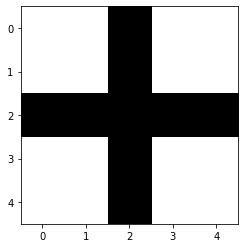

In [26]:
plt.imshow(make_cross_image(), cmap="Greys");

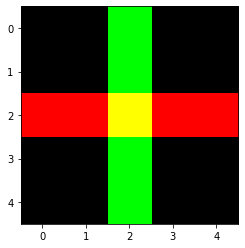

In [27]:
plt.imshow(make_cross_image(False).permute(1,2,0));

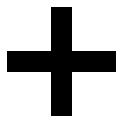

In [30]:
im = make_cross_image()
ax = show_image(im, cmap="Greys", figsize=(2,2))

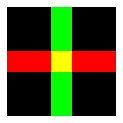

In [31]:
im2 = make_cross_image(False)
ax = show_image(im2, figsize=(2,2))

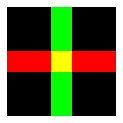

In [35]:
im3 = im2.permute(1,2,0)
ax = show_image(im3, figsize=(2,2))

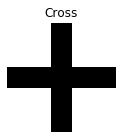

In [36]:
ax = show_image(im, cmap="Greys", figsize=(2,2))
show_title("Cross", ax);

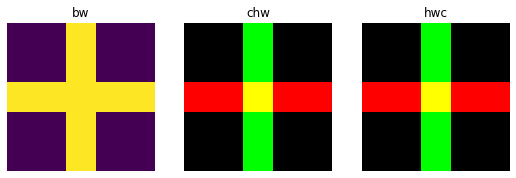

In [37]:
show_image_batch(([im, im2, im3], ["bw", "chw", "hwc"]), items=3)

## Model init 